<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/FruitsVegetables/FruitsVegetables_Baseline_Model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil

In [ ]:
plt.style.use('seaborn')

# **Data Loading**

[Fruits-262](https://www.kaggle.com/aelchimminut/fruits262)

[Fresh and Stale Images of Fruits and Vegetables](https://www.kaggle.com/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables?select=fresh_apple)

[Tomato Cultivars](https://www.kaggle.com/olgabelitskaya/tomato-cultivars?select=01_019.png)

[Fruits 360](https://www.kaggle.com/moltean/fruits)

[Fruits & Vegetables](https://www.kaggle.com/jorgebailon/fruits-vegetables)

[fruits_vegetables_photos](https://www.kaggle.com/balalexv/fruits-vegetables-photos?select=TRAIN)

This dataset contains image data of fruits and vegetables. With six classes namely:

* `Banana`  :  3070 images
* `Apple`  :  3352 images
* `Orange`  :  2977 images
* `Tomato`  :  442 images
* `Broccoli`  :  315 images
* `Carrot`  :  1001 images

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing

In [ ]:
# Use this to download easily (only on google colab)
# !gdown --id 1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY

**Download dataset in Google Drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing' # The shareable link

In [ ]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('fruitsvegetables.zip')  

In [ ]:
file_zip = 'fruitsvegetables.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./fruitsvegetables/')
zip_ref.close()

In [ ]:
dir = './fruitsvegetables/'
list_category = sorted(os.listdir(dir))
list_category

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# **Data Arrange**

In [ ]:
# make directory name for data training and validation (test) 
train_directory = os.path.join(dir, 'train')
validation_directory = os.path.join(dir, 'val')

# check if already exists
if not os.path.exists(train_directory) :
  os.mkdir(train_directory)

if not os.path.exists(validation_directory) :
  os.mkdir(validation_directory)

In [ ]:
# check a lot of data for :
# {'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}
apple_dir = os.path.join(dir,'apple')
banana_dir = os.path.join(dir, 'banana')
broccoli_dir = os.path.join(dir, 'broccoli')
carrot_dir = os.path.join(dir,'carrot')
orange_dir = os.path.join(dir, 'orange')
tomato_dir = os.path.join(dir, 'tomato')

print("Apple :", len(os.listdir(apple_dir)))
print("Banana :", len(os.listdir(banana_dir))) 
print("Broccoli :", len(os.listdir(broccoli_dir)))
print("Carrot :", len(os.listdir(carrot_dir)))
print("Orange :", len(os.listdir(orange_dir))) 
print("Tomato :", len(os.listdir(tomato_dir)))

Apple : 3352
Banana : 3070
Broccoli : 315
Carrot : 1001
Orange : 2977
Tomato : 442


In [ ]:
from sklearn.model_selection import train_test_split
train_apple_dir, val_apple_dir = train_test_split(os.listdir(apple_dir), test_size = 0.2, random_state=43)
train_banana_dir, val_banana_dir = train_test_split(os.listdir(banana_dir), test_size = 0.2, random_state=43)
train_broccoli_dir, val_broccoli_dir = train_test_split(os.listdir(broccoli_dir), test_size = 0.2, random_state=43)
train_carrot_dir, val_carrot_dir = train_test_split(os.listdir(carrot_dir), test_size = 0.2, random_state=43)
train_orange_dir, val_orange_dir = train_test_split(os.listdir(orange_dir), test_size = 0.2, random_state=43)
train_tomato_dir, val_tomato_dir = train_test_split(os.listdir(tomato_dir), test_size = 0.2, random_state=43)

In [ ]:
# spread dir data for train and test (validation)
datasets = [train_directory, validation_directory]

train_apple = os.path.join(train_directory, 'apple')
train_banana = os.path.join(train_directory, 'banana')
train_broccoli = os.path.join(train_directory, 'broccoli')
train_carrot = os.path.join(train_directory, 'carrot')
train_orange = os.path.join(train_directory, 'orange')
train_tomato = os.path.join(train_directory, 'tomato')

val_apple = os.path.join(validation_directory, 'apple')
val_banana = os.path.join(validation_directory, 'banana')
val_broccoli = os.path.join(validation_directory, 'broccoli')
val_carrot = os.path.join(validation_directory, 'carrot')
val_orange = os.path.join(validation_directory, 'orange')
val_tomato = os.path.join(validation_directory, 'tomato')

In [ ]:
train_sets = [train_apple, train_banana, train_broccoli, train_carrot, train_orange, train_tomato]
for item in train_sets :
  if not os.path.exists(item):
    os.mkdir(item)

val_sets = [val_apple, val_banana, val_broccoli, val_carrot, val_orange, val_tomato]
for item in val_sets :
  if not os.path.exists(item):
    os.mkdir(item)

In [ ]:
category_sets = [apple_dir, banana_dir, broccoli_dir, carrot_dir, orange_dir, tomato_dir]
train_category_sets = [train_apple_dir, train_banana_dir, train_broccoli_dir, train_carrot_dir, train_orange_dir, train_tomato_dir]
val_category_sets = [val_apple_dir, val_banana_dir, val_broccoli_dir, val_carrot_dir, val_orange_dir, val_tomato_dir]

for i in range(len(category_sets)):
  for item in train_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(train_sets[i], item))

for i in range(len(category_sets)):
  for item in val_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(val_sets[i], item))

In [ ]:
for i, category in enumerate(train_sets):
  print('train ',list_category[i],' = ',len(os.listdir(category)))

for i, category in enumerate(val_sets):
  print('val ',list_category[i],' = ',len(os.listdir(category)))

train  apple  =  2681
train  banana  =  2456
train  broccoli  =  252
train  carrot  =  800
train  orange  =  2381
train  tomato  =  353
val  apple  =  671
val  banana  =  614
val  broccoli  =  63
val  carrot  =  201
val  orange  =  596
val  tomato  =  89


**Split Folder**

In [ ]:
#!pip install split-folders
#import splitfolders

#membagi data menjadi 2 training dan validation, dengan rasio training 80% dan validation 40%
#splitfolders.ratio(path, '/content/data_result', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

# **Exploratory Data Analyis (EDA)**

In [ ]:
print(list_category)

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']


In [ ]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

apple  :  3352 images
banana  :  3070 images
broccoli  :  315 images
carrot  :  1001 images
orange  :  2977 images
tomato  :  442 images


In [ ]:
# delete dir that is not used
# import shutil

# list_category = ['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# for x in listdir_image:
#   if x not in list_category:
#     path = os.path.join(dir_image, x)
#     if os.path.isfile(path):
#         os.remove(path)
#     elif os.path.isdir(path):
#         shutil.rmtree(path)
#     else:
#         print("Unknown or already remove!")

# listdir_image = os.listdir(dir_image)
# listdir_image

In [ ]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

apple: 3352
+ size =  (416, 448)
+ size =  (296, 336)
+ size =  (256, 256)
+ size =  (404, 390)
+ size =  (372, 370)
banana: 3070
+ size =  (614, 392)
+ size =  (494, 420)
+ size =  (602, 448)
+ size =  (708, 490)
+ size =  (256, 256)
broccoli: 315
+ size =  (480, 320)
+ size =  (400, 400)
+ size =  (480, 343)
+ size =  (2234, 1658)
+ size =  (480, 319)
carrot: 1001
+ size =  (235, 235)
+ size =  (180, 281)
+ size =  (350, 225)
+ size =  (800, 140)
+ size =  (600, 450)
orange: 2977
+ size =  (458, 374)
+ size =  (404, 330)
+ size =  (390, 382)
+ size =  (384, 364)
+ size =  (354, 322)
tomato: 442
+ size =  (600, 489)
+ size =  (160, 160)
+ size =  (100, 100)
+ size =  (160, 160)

Total : 11157


apple


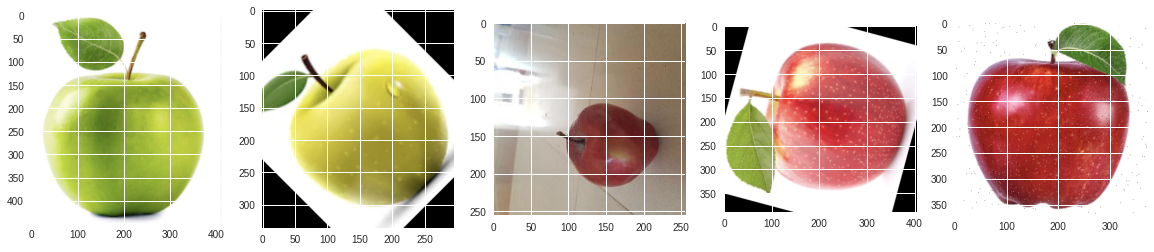

banana


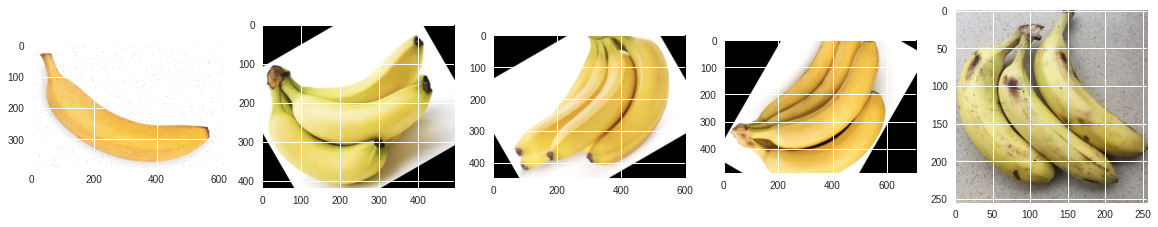

broccoli


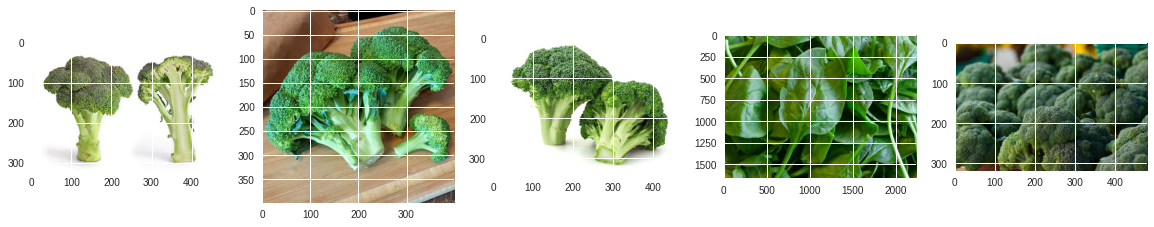

carrot


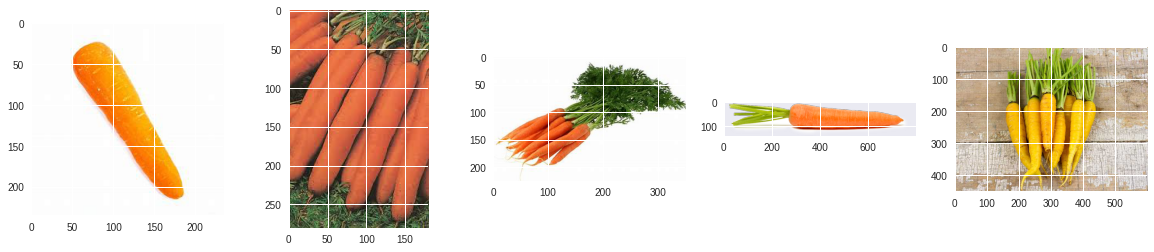

orange


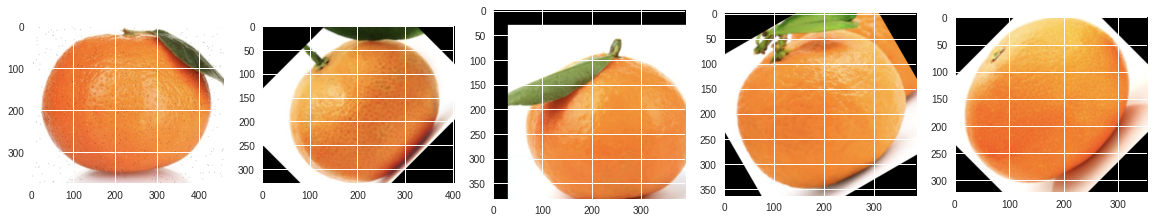

tomato


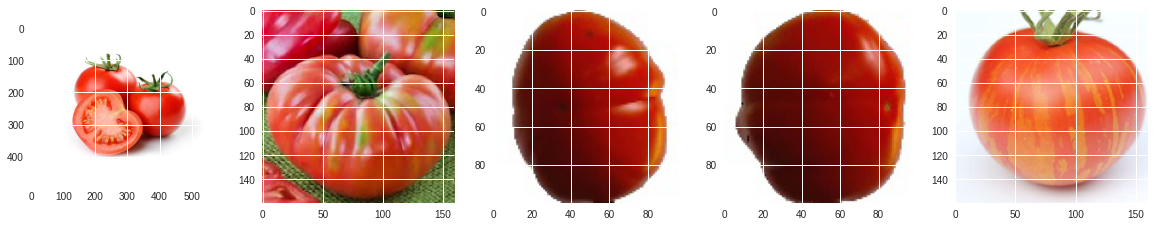

In [ ]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modeling 01**

## **Image Augmentation**

In [ ]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255,)

In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =(150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

Found 8921 images belonging to 6 classes.
Found 2234 images belonging to 6 classes.


In [ ]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [ ]:
validation_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [ ]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

## **Train Model 01**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 1.6100 - accuracy: 0.3230

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 124s 1s/step - loss: 1.6100 - accuracy: 0.3230 - val_loss: 1.3334 - val_accuracy: 0.3768

Epoch 00001: val_accuracy improved from -inf to 0.37684, saving model to best_model_2_v1.h5
Epoch 2/50
13/69 [====>.........................] - ETA: 56s - loss: 1.3013 - accuracy: 0.4375

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v1.tflite')
    files.download('fruitsvegetable_02_v1.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v1.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v1_best.tflite')
    files.download('fruitsvegetable_02_v1_best.txt')
except:
    pass

## **Train Model 02**

In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v2.tflite')
    files.download('fruitsvegetable_02_v2.txt')
except:
    pass

### **Save Model for best_model.h5**


In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v2.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v2_best.tflite')
    files.download('fruitsvegetable_02_v2_best.txt')
except:
    pass

## **Train Model 03**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v3.tflite')
    files.download('fruitsvegetable_02_v3.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v3.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v3_best.tflite')
    files.download('fruitsvegetable_02_v3_best.txt')
except:
    pass

## **Train Model 04**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v4.tflite')
    files.download('fruitsvegetable_02_v4.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v4.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v4_best.tflite')
    files.download('fruitsvegetable_02_v4_best.txt')
except:
    pass

## **Train Model 05**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v5.tflite')
    files.download('fruitsvegetable_02_v5.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v5.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v5_best.tflite')
    files.download('fruitsvegetable_02_v5_best.txt')
except:
    pass

## **Train Model 06**

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.summary()

In [ ]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v6.tflite')
    files.download('fruitsvegetable_02_v6.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v6.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v6_best.tflite')
    files.download('fruitsvegetable_02_v6_best.txt')
except:
    pass

## **Train Model 07**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v7.tflite')
    files.download('fruitsvegetable_02_v7.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v7.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v7_best.tflite')
    files.download('fruitsvegetable_02_v7_best.txt')
except:
    pass

## **Train Model 08**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_1_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

### **Plot Model**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v8.tflite')
    files.download('fruitsvegetable_02_v8.txt')
except:
    pass

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v8.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_02_v8_best.tflite')
    files.download('fruitsvegetable_02_v8_best.txt')
except:
    pass